# Indian Population (Non linear dataset)

In [67]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [68]:
# reading data
df = pd.read_csv('../datasets/Regression/indian population new.csv')
df.head()

,Year,Population,% Increase in Population,Population Density,% Increase in Population Density,Urban Population,Urban Population % of Total Population,% Increase in Urban Population,Rural Population,Rural Population % of Total Population,...,Birth Rate,% Change in Birth Rate,Death Rate,% Change in Death Rate,Infant Mortality Rate,% Change in Infant Mortality Rate,Fertility Rate,% Change in Fertility Rate,Net Migration Rate,% Change in Net Migration Rate
0,1950,"35,70,21,100",0.00%,108.61,0.00%,Null,Null,Null,Null,Null,...,44.175,0.00%,28.161,0.00%,189.629,0.00%,5.907,0.00%,-0.043,0.00%
1,1951,"36,49,22,360",2.21%,111.01,2.21%,Null,Null,Null,Null,Null,...,43.970,-0.46%,27.584,-2.05%,186.737,-1.53%,5.906,-0.02%,-0.047,9.30%
2,1952,"37,29,97,188",2.21%,113.47,2.21%,Null,Null,Null,Null,Null,...,43.764,-0.47%,27.008,-2.09%,183.846,-1.55%,5.904,-0.03%,-0.050,6.38%
3,1953,"38,12,27,705",2.21%,115.97,2.21%,Null,Null,Null,Null,Null,...,43.558,-0.47%,26.432,-2.13%,180.954,-1.57%,5.903,-0.02%,-0.054,8.00%
4,1954,"38,97,31,406",2.23%,118.56,2.23%,Null,Null,Null,Null,Null,...,43.352,-0.47%,25.856,-2.18%,178.062,-1.60%,5.902,-0.02%,-0.058,7.41%


In [69]:
def toNumeric(data):
    x = data.split(',')
    s = ''
    for i in x:
        s += i
    y = float(s)
    return y

In [70]:
xdata = np.asanyarray(df['Year'])
ydata = np.asanyarray(df['Population'])

y_data = np.array([0]*len(df))
for i in range(len(df)):
    y_data[i] = toNumeric(ydata[i])
    
ydata = y_data

In [71]:
# normalizing the data
x_data = xdata/np.max(xdata)
y_data = ydata/np.max(ydata)

In [72]:
# splitting data
msk = np.random.rand(len(df)) < 0.8
train_x = x_data[msk]
train_y = y_data[msk]

test_x = x_data[~msk]
test_y  = y_data[~msk]

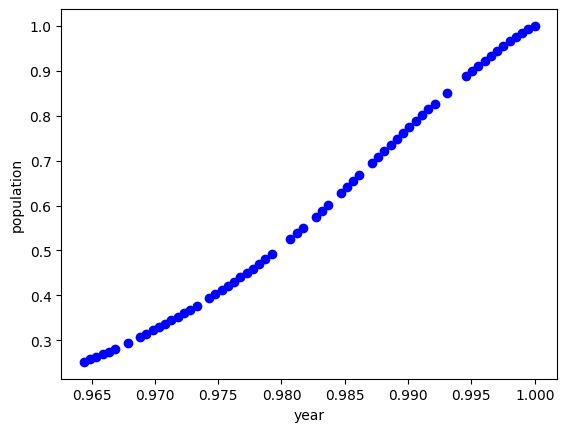

In [73]:
# plotting training data
plt.scatter(train_x, train_y, color='blue')
plt.xlabel('year')
plt.ylabel('population')
plt.show()

##### in this figure, we can see that at first slope is low, at middle slope is high and at end slope is again low. so i am going to use logistic function to find the best fit line.

In [74]:
def sigmoid(x, beta_1, beta_2):
    y =  0.19 + (1/(1+np.exp(-beta_1*(x-beta_2))))
    return y

In [75]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid, train_x, train_y)
popt

array([110.41368778,   0.98691725])

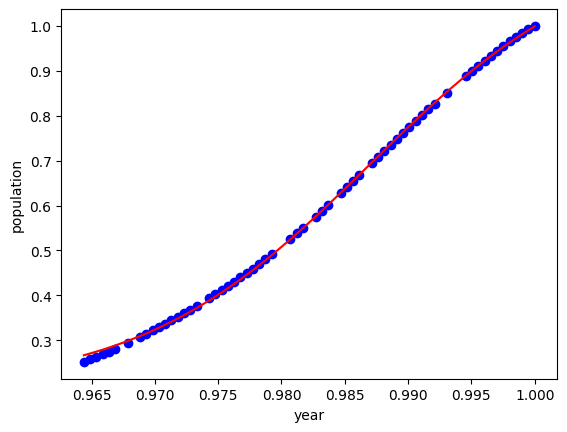

In [76]:
# plotting the curve
y_predict = sigmoid(train_x, *popt)

plt.scatter(train_x, train_y, color='blue')
plt.plot(train_x, y_predict,'-r')
plt.xlabel('year')
plt.ylabel('population')
plt.show()

## now testing the model

In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = sigmoid(test_x, *popt)

print("R² score:", r2_score(test_y, y_pred))
print("MSE:", mean_squared_error(test_y, y_pred))
print("MAE:", mean_absolute_error(test_y, y_pred))


R² score: 0.9998006387377065
MSE: 8.300985107751378e-06
MAE: 0.0024364328159751547


In [78]:
val = sigmoid(2018/np.max(xdata), *popt)*np.max(ydata)
print(val)

1364927072.0049016
